# Loading and Preprocessing the Data

In [1]:
import numpy as np
import os
from keras.utils import to_categorical
from sklearn.utils import shuffle

np.random.seed(10)

#load the data
data = np.loadtxt('emnist-letters-train.csv',delimiter=',')

#shuffle the data
shuffled_data = shuffle(data)


#split pixel data without the labels
val_data = shuffled_data[:8800,1:] 
train_data = shuffled_data[8800:61600, 1:]
test_data = shuffled_data[61600:,1:]

#reshape pixel data to make it mold to CNN architecture
train_data = train_data.reshape(train_data.shape[0],28,28,1)
test_data = test_data.reshape(test_data.shape[0],28,28,1)
val_data = val_data.reshape(val_data.shape[0],28,28,1)

#normalize the pixel data for ease of computation in CNN
train_data = train_data.astype('float32')/255.0
test_data = test_data.astype('float32')/255.0
val_data = val_data.astype('float32')/255.0

#save the labels
labels = shuffled_data[:,0]

#one-hot encode the labels
labels = to_categorical(labels)

#split label data to appropriate size
val_labels = labels[:8800]
train_labels = labels[8800:61600]
test_labels = labels[61600:]

#save the labels without the first column, extra dimension of all zeros for some reason?
val_labels = val_labels[:,1:]
train_labels = train_labels[:,1:]
test_labels = test_labels[:,1:]






/home/mathlizard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Model the CNN architecture

In [2]:
from keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(
    32,
    (3,3),
    activation="relu",
    input_shape=(28, 28, 1)
))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(26, activation="softmax"))

model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               73856     
__________

In [3]:
history = model.fit(
    train_data, train_labels, 
    epochs=8,     
    batch_size=64,
    validation_data=(val_data, val_labels)
)

Train on 52800 samples, validate on 8800 samples
Epoch 1/8
52800/52800 [==============================] - 23s 436us/step - loss: 0.7558 - acc: 0.7656 - val_loss: 0.4190 - val_acc: 0.8549
Epoch 2/8
52800/52800 [==============================] - 26s 489us/step - loss: 0.3145 - acc: 0.8962 - val_loss: 0.2760 - val_acc: 0.9082
Epoch 3/8
52800/52800 [==============================] - 25s 479us/step - loss: 0.2463 - acc: 0.9166 - val_loss: 0.2498 - val_acc: 0.9200
Epoch 4/8
52800/52800 [==============================] - 25s 479us/step - loss: 0.2100 - acc: 0.9293 - val_loss: 0.2581 - val_acc: 0.9135
Epoch 5/8
52800/52800 [==============================] - 26s 487us/step - loss: 0.1891 - acc: 0.9350 - val_loss: 0.2561 - val_acc: 0.9210
Epoch 6/8
52800/52800 [==============================] - 25s 479us/step - loss: 0.1692 - acc: 0.9416 - val_loss: 0.2451 - val_acc: 0.9217
Epoch 7/8
52800/52800 [==============================] - 26s 483us/step - loss: 0.1565 - acc: 0.9440 - val_loss: 0.2549 - v

In [4]:
import matplotlib.pyplot as plt
plt.subplot(1,1,1)
plt.plot(history.history['val_acc'], label='validation_acc')
plt.plot(history.history['acc'], label='train_acc')
plt.legend()
plt.show()
plt.close()

<Figure size 640x480 with 1 Axes>

In [5]:
# test_loss, test_acc = model.evaluate(train_data, train_labels)  
# print(test_loss, test_acc)

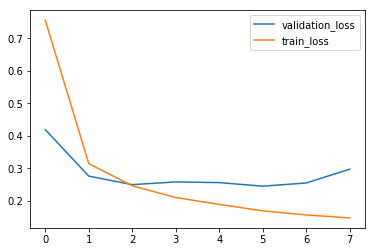

In [6]:
plt.subplot(1,1,1)
plt.plot(history.history['val_loss'], label='validation_loss')
plt.plot(history.history['loss'], label='train_loss')
plt.legend()
plt.show()
plt.close()